# Example notebook
This is a notebook with few examples on how to read, manipulate and display images

# Necessary imports

In [1]:
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from napari import Viewer
from pathlib import Path

# Reading the image

In [2]:
# You might need to modify the path according to where you saved your dataset
# Note that the `Path` library will deal with OS dependant path issues
path = Path('../data/placozoan-movie.tif')
im = imread(path)
nb_time_points = im.shape[0]

# Visualizing 4 time points with matplotlib

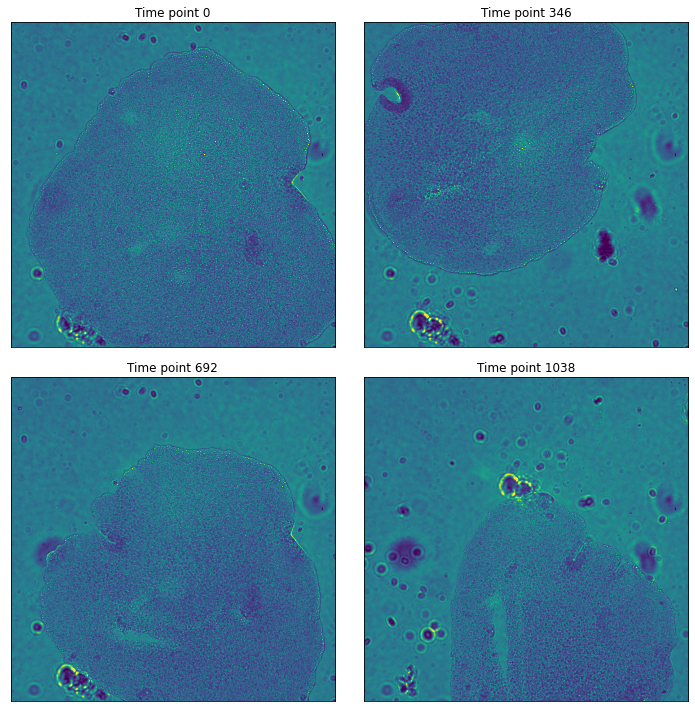

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'aspect':1}, sharex=True, sharey=True)
axes = axes.flatten()
for i, ax in enumerate(axes):
    tp = i*(nb_time_points-1)//(len(axes)-1)
    ax.imshow(im[tp, ...], vmin=10, vmax=100)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Time point {tp}')
fig.tight_layout()

# Visualization around laser ablation

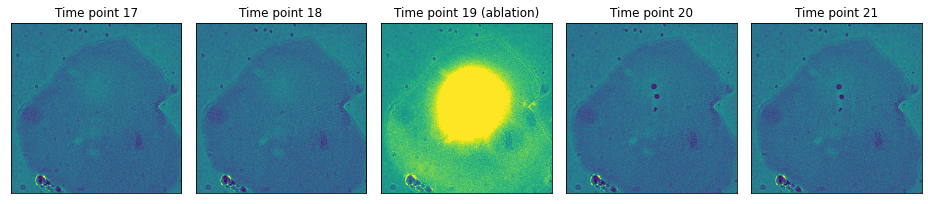

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(13, 5), subplot_kw={'aspect':1}, sharex=True, sharey=True)
axes = axes.flatten()
for i, ax in enumerate(axes):
    tp = 17+i
    ax.imshow(im[tp, ...], vmin=10, vmax=100)
    ax.set_xticks([])
    ax.set_yticks([])
    if tp==19:
        ax.set_title(f'Time point {tp} (ablation)')
    else:
        ax.set_title(f'Time point {tp}')
fig.tight_layout()

# Visualization with napari

In [5]:
viewer = Viewer()
viewer.add_image(im)

<Image layer 'im' at 0x169b1ed00>

# Smoothing the first time-point image with a gaussian blur

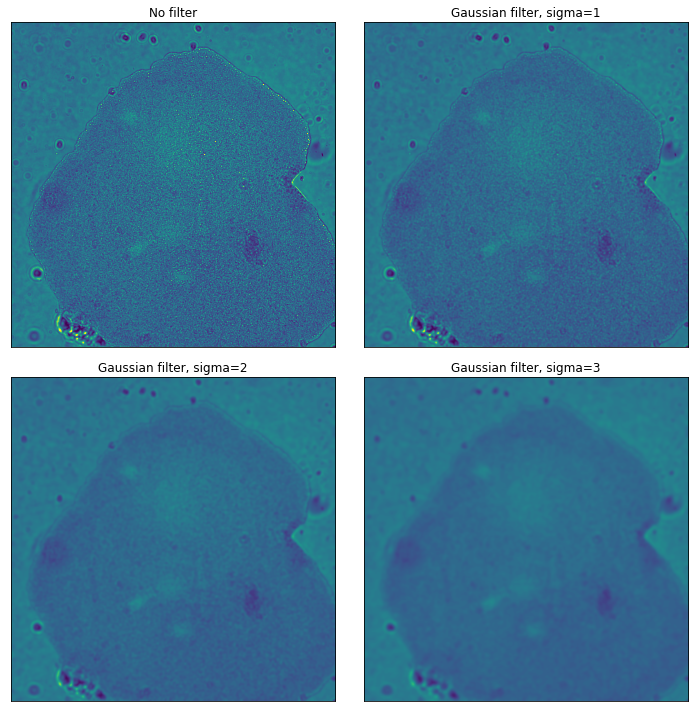

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'aspect':1})
axes = axes.flatten()
ax = axes[0]
ax.imshow(im[0, ...], vmin=10, vmax=100)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('No filter')
for sigma, ax in zip(range(1, 5), axes[1:]):
    filtered = nd.gaussian_filter(im[0, ...], sigma=sigma)
    ax.imshow(filtered, vmin=10, vmax=100)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Gaussian filter, sigma={sigma}');
    fig.tight_layout()